# Data Cleaning

In [5]:
!pip install wget

In [15]:
import pandas as pd
import wget

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
Path = '/content/drive/My Drive/Data/mainSimulationAccessTraces.csv'
df_data_1 = pd.read_csv(Path)
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


# Missing Value

In [24]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

# Unexpected Values

In [25]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

# Cleaned Data

In [26]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


# Frequency Distribution Visualization

In [27]:
import matplotlib.pyplot as plt
import random
import numpy as np

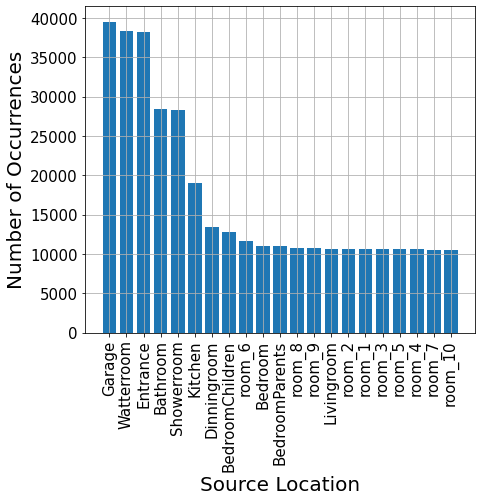

In [28]:
source_loc_count = df_data_1.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(source_loc_count.index, source_loc_count.values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [29]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


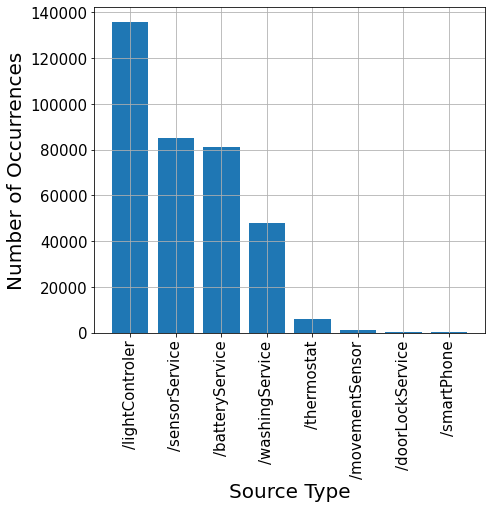

In [30]:
source_type_count = df_data_1.sourceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(source_type_count.index, source_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [31]:
for i in source_type_count.index:
    print(i)

/lightControler
/sensorService
/batteryService
/washingService
/thermostat
/movementSensor
/doorLockService
/smartPhone


In [32]:
for i in source_type_count.values:
    print(i)

135775
85196
81267
47986
5980
1301
330
106


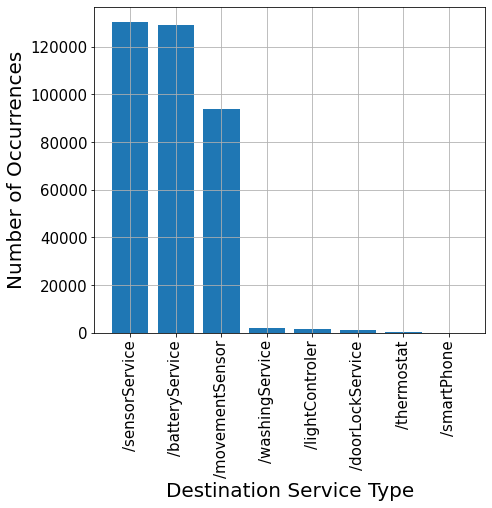

In [33]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [34]:
for i in destination_type_count.index:
    print(i)

/sensorService
/batteryService
/movementSensor
/washingService
/lightControler
/doorLockService
/thermostat
/smartPhone


In [35]:
for i in destination_type_count.values:
    print(i)

130313
129119
93645
1805
1694
1043
319
3


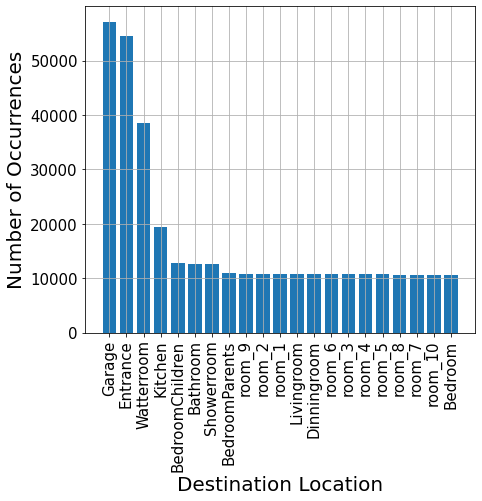

In [36]:
destination_location_count = df_data_1.destinationLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_location_count.index, destination_location_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [37]:
for i in destination_location_count.index:
    print(i)

Garage
Entrance
Watterroom
Kitchen
BedroomChildren
Bathroom
Showerroom
BedroomParents
room_9
room_2
room_1
Livingroom
Dinningroom
room_6
room_3
room_4
room_5
room_8
room_7
room_10
Bedroom


In [38]:
for i in destination_location_count.values:
    print(i)

57100
54448
38524
19437
12768
12684
12583
10938
10843
10828
10805
10781
10759
10741
10732
10708
10687
10651
10649
10648
10627


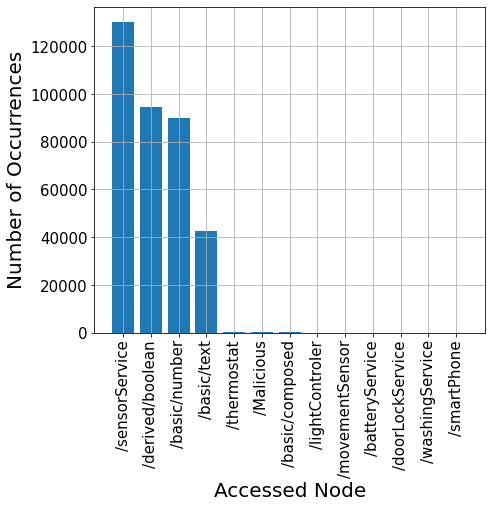

In [39]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [40]:
for i in accessed_node_count.index:
    print(i)

/sensorService
/derived/boolean
/basic/number
/basic/text
/thermostat
/Malicious
/basic/composed
/lightControler
/movementSensor
/batteryService
/doorLockService
/washingService
/smartPhone


In [41]:
for i in accessed_node_count.values:
    print(i)

130155
94725
90010
42428
313
148
100
23
22
6
5
3
3


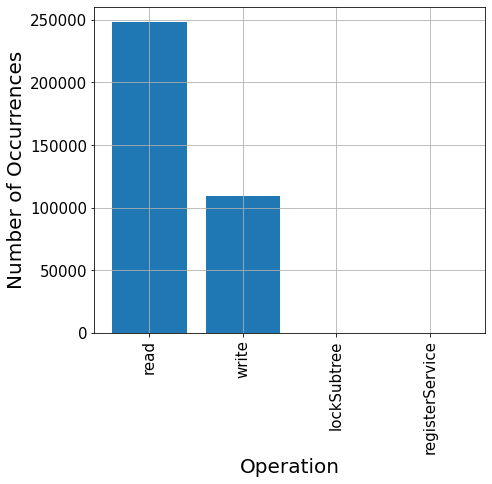

In [42]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [43]:
for i in operation_count.index:
    print(i)

read
write
lockSubtree
registerService


In [44]:
for i in operation_count.values:
    print(i)

248061
109648
148
84


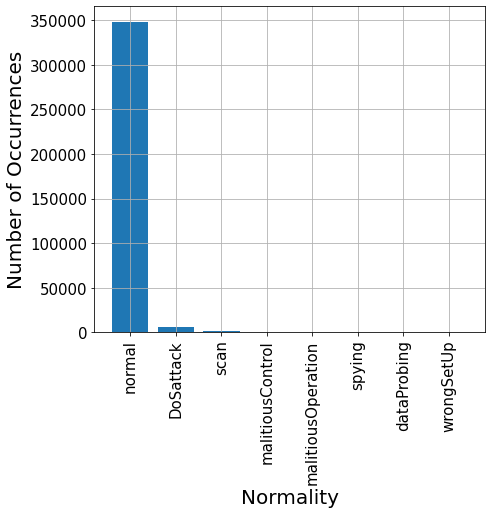

In [45]:
normality_count = df_data_1.normality.value_counts()
indices = ['normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(indices, normality_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [46]:
for i in normality_count.index:
    print(i)

normal
anomalous(DoSattack)
anomalous(scan)
anomalous(malitiousControl)
anomalous(malitiousOperation)
anomalous(spying)
anomalous(dataProbing)
anomalous(wrongSetUp)


In [47]:
for i in normality_count.values:
    print(i)

347924
5780
1547
889
805
532
342
122


# Making Features

In [48]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [50]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [51]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [53]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [54]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [55]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [56]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [57]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [58]:
y_resized = y.reshape(len(y),1)

In [59]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [60]:
df_spark = pd.DataFrame(df_spark)

In [61]:
df_spark.to_csv('DF_Spark.csv')